In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('C:/Users/user/Desktop/Data_Minning_Project/two_years_merged_and_reduced.csv')

In [3]:
dataset.describe()

,cluster,Temperature,RelativeHumidity,Wind_U,Wind_V,Pressure,CloudCover,WindGustSpeed,distance,power-production
count,192384.000000,192384.000000,192384.000000,192384.000000,192384.000000,192384.000000,192384.000000,192384.000000,192384.000000,192384.000000
mean,1.000000,278.537644,0.802655,0.619949,0.196601,101243.549322,0.633146,6.855059,0.519272,534.552779
std,0.816499,9.985153,0.161314,2.751697,2.585685,1172.048862,0.341100,3.381700,0.025856,494.775615
min,0.000000,244.080900,0.218900,-12.141311,-18.935474,96752.914000,0.000000,0.000000,0.467481,0.000900
25%,0.000000,272.103165,0.702386,-1.031017,-1.326877,100541.541500,0.334133,4.261461,0.504208,152.769296
50%,1.000000,278.090560,0.850140,0.510489,0.154915,101306.167000,0.725581,6.266438,0.518670,374.462099
75%,2.000000,286.424250,0.936252,2.183138,1.669949,101976.842000,0.965212,8.806247,0.540113,773.615788
max,2.000000,305.094420,0.999999,14.479170,16.306187,105537.190000,1.000000,28.083632,0.557766,2705.600201


In [4]:
dataset.shape

(192384, 12)

In [5]:
dataset.head()

,time,cluster,region,Temperature,RelativeHumidity,Wind_U,Wind_V,Pressure,CloudCover,WindGustSpeed,distance,power-production
0,2001-09-25 00:00:00+00:00,0.0,SE1,276.27032,0.874569,0.555601,-0.906430,101428.56,0.607713,3.095568,0.507503,234.255257
1,2001-09-25 00:00:00+00:00,0.0,SE2,275.47623,0.952604,-0.051448,0.466945,101536.75,0.293875,1.910384,0.557766,507.915347
2,2001-09-25 00:00:00+00:00,0.0,SE3,280.37006,0.875572,-1.359538,-0.576212,101493.20,0.515114,3.452081,0.512443,325.436187
3,2001-09-25 00:00:00+00:00,0.0,SE4,283.44300,0.857183,-2.918322,-1.645965,101162.03,0.419923,5.657266,0.512595,372.884422
4,2001-09-25 00:00:00+00:00,1.0,SE1,278.41770,0.790456,1.448222,-1.308097,101332.71,0.858191,4.362358,0.544618,234.255257


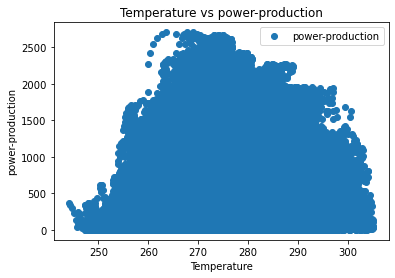

In [6]:
dataset.plot(x='Temperature', y='power-production', style='o')  
plt.title('Temperature vs power-production')  
plt.xlabel('Temperature')  
plt.ylabel('power-production')  
plt.show()

In [7]:
dataset_temp = dataset[dataset.region == "SE1"]

In [8]:
dataset_temp.head()

,time,cluster,region,Temperature,RelativeHumidity,Wind_U,Wind_V,Pressure,CloudCover,WindGustSpeed,distance,power-production
0,2001-09-25 00:00:00+00:00,0.0,SE1,276.27032,0.874569,0.555601,-0.906430,101428.56,0.607713,3.095568,0.507503,234.255257
4,2001-09-25 00:00:00+00:00,1.0,SE1,278.41770,0.790456,1.448222,-1.308097,101332.71,0.858191,4.362358,0.544618,234.255257
8,2001-09-25 00:00:00+00:00,2.0,SE1,279.53290,0.952815,1.667759,-1.618223,101208.35,0.999297,4.887512,0.529363,234.255257
12,2001-09-25 01:00:00+00:00,0.0,SE1,276.23117,0.884437,0.434166,-0.920708,101421.44,0.630413,3.014765,0.507503,234.628610
16,2001-09-25 01:00:00+00:00,1.0,SE1,278.60132,0.799537,1.278175,-1.400337,101332.95,0.824760,4.313182,0.544618,234.628610


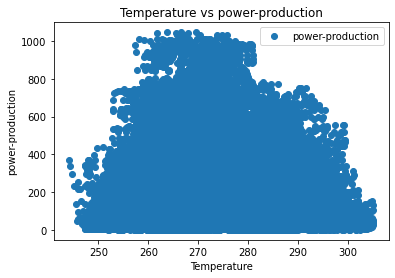

In [9]:
dataset_temp.plot(x='Temperature', y='power-production', style='o')  
plt.title('Temperature vs power-production')  
plt.xlabel('Temperature')  
plt.ylabel('power-production')  
plt.show()

<AxesSubplot:xlabel='Pressure', ylabel='power-production'>

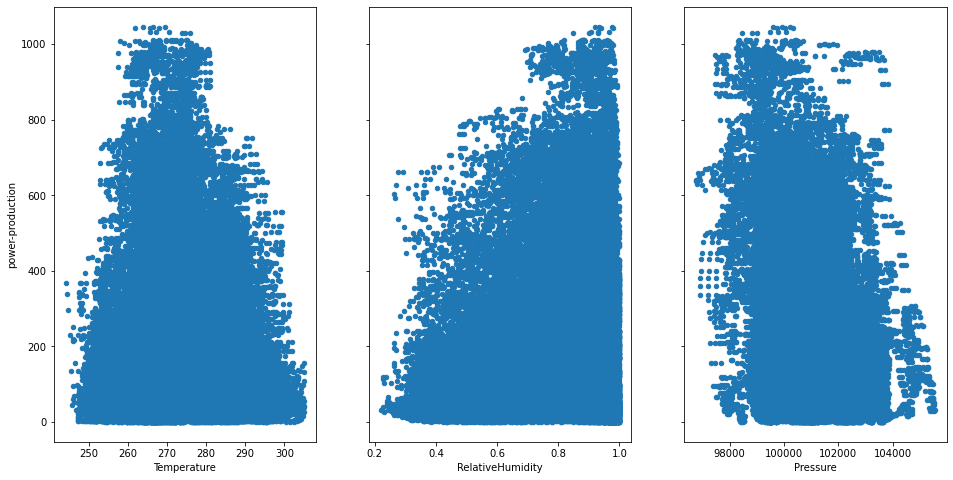

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True)
dataset_temp.plot(kind='scatter', x='Temperature', y='power-production', ax=axs[0], figsize=(16, 8))
dataset_temp.plot(kind='scatter', x='RelativeHumidity', y='power-production', ax=axs[1])
dataset_temp.plot(kind='scatter', x='Pressure', y='power-production', ax=axs[2])